In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import importlib

pd.options.display.float_format = '{:20,.2f}'.format
%matplotlib inline

In [2]:
import gc
from itertools import product
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 50)

In [3]:
path = "/home/gustavosystemas/Downloads/data_folder/"
sales = pd.read_csv(path+"sales_train_v2.csv")
sales["date"] = pd.to_datetime(sales["date"], format='%d.%m.%Y')
categories = pd.read_csv(path+"item_categories.csv")
items = pd.read_csv(path + "items.csv")
shops = pd.read_csv(path + "shops.csv")

In [4]:
test =  pd.read_csv("test.csv")

In [6]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [7]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,"2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00"
mean,14.57,33.00,"10,197.23",890.85,1.24
std,9.42,16.23,"6,324.30","1,729.80",2.62
min,0.00,0.00,0.00,-1.00,-22.00
25%,7.00,22.00,"4,476.00",249.00,1.00
50%,14.00,31.00,"9,343.00",399.00,1.00
75%,23.00,47.00,"15,684.00",999.00,1.00
max,33.00,59.00,"22,169.00","307,980.00","2,169.00"


In [8]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.00
1,2013-01-03,0,25,2552,899.00,1.00
2,2013-01-05,0,25,2552,899.00,-1.00
3,2013-01-06,0,25,2554,"1,709.05",1.00
4,2013-01-15,0,25,2555,"1,099.00",1.00


In [7]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
categories.item_category_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

## Checking other kernels
  I must admit that I get someuseful codes from other kernels, the following lines are part of code from another kernel that translate some of the categories from Russian to English language.

In [5]:
l = list(categories.item_category_name.unique())
l_cat = l

In [6]:
# Reusing from kernels I found at kaggle
for ind in range(1,8):
    l_cat[ind] = 'Access'

for ind in range(10,18):
    l_cat[ind] = 'Consoles'

for ind in range(18,25):
    l_cat[ind] = 'Consoles Games'

for ind in range(26,28):
    l_cat[ind] = 'phone games'

for ind in range(28,32):
    l_cat[ind] = 'CD games'

for ind in range(32,37):
    l_cat[ind] = 'Card'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Gifts'

for ind in range(73,79):
    l_cat[ind] = 'Soft'

categories['cats'] = l_cat

In [7]:
# Reusing from kernels I found at kaggle
categories['cats'] = categories['cats'].replace('Чистые носители (штучные)','Clean media (piece)')
categories['cats'] = categories['cats'].replace('Чистые носители (шпиль)','Clean carriers (spire)')
categories['cats'] = categories['cats'].replace('Служебные - Билеты','Official - Tickets')
categories['cats'] = categories['cats'].replace('Игры - Аксессуары для игр', 'Games')
categories['cats'] = categories['cats'].replace('Доставка товара','Delivery of goods')
categories['cats'] = categories['cats'].replace('Билеты (Цифра)','Tickets (figure)')
categories['cats'] = categories['cats'].replace('PC - Гарнитуры/Наушники', 'Headphones')
categories['cats'] = categories['cats'].replace('Служебные','Office')

In [8]:
categories.head()

,item_category_name,item_category_id,cats
0,PC - Гарнитуры/Наушники,0,Headphones
1,Аксессуары - PS2,1,Access
2,Аксессуары - PS3,2,Access
3,Аксессуары - PS4,3,Access
4,Аксессуары - PSP,4,Access


In [15]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [12]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


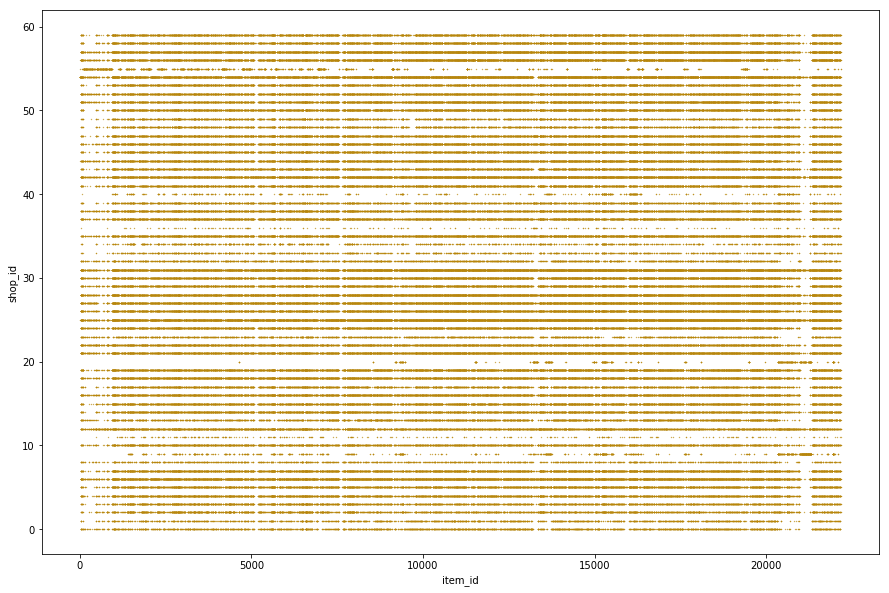

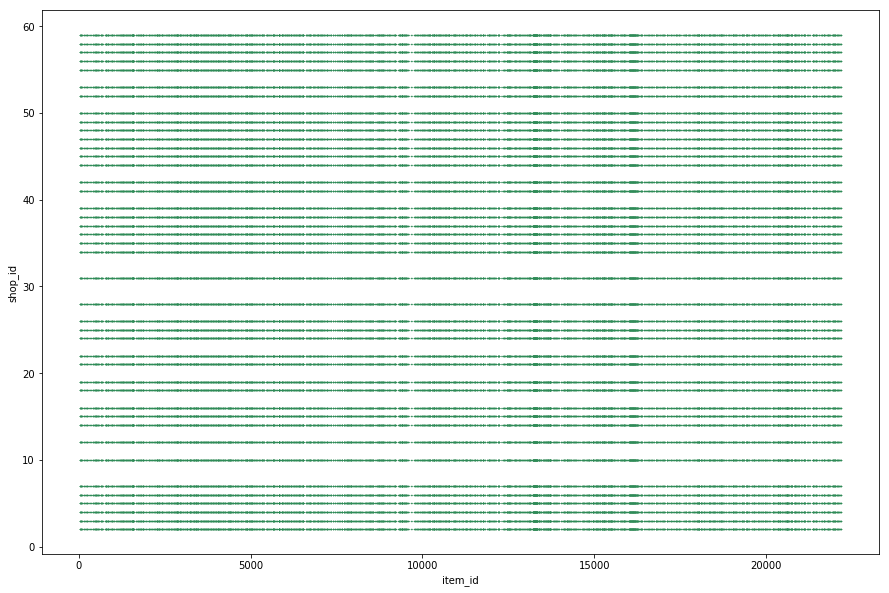

In [18]:
sales.drop_duplicates(subset=['item_id', 'shop_id']).plot.scatter('item_id', 'shop_id', color='darkgoldenrod', s = 0.1, figsize=(15,10))
test.drop_duplicates(subset=['item_id', 'shop_id']).plot.scatter('item_id', 'shop_id', color='seagreen', s = 0.1,figsize=(15,10))


On the one hand, We can see in the first plot that there is several points that do not match the horizontal lines, This dataset was made from original transactions, So it means that we are not going to find every combination between shop_id and item_id.

On the other hand, the test dataset seems to have just horizontal lines, so this dataset was made by a multiplication between shop_id and item_id.

In [15]:
# Converting to a Month Instance
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
day               int64
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 156.8 MB


In [8]:
sales["month"]=sales.date.dt.month
sales["year"]=sales.date.dt.year

In [53]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 8 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
month             int64
year              int64
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 179.2 MB


# Exploratory Data Analysis

In [19]:
sales.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'shop_name', 'item_name',
       'item_category_id', 'item_category_name', 'cats'],
      dtype='object')

## item_cnt_day

In [30]:
sales.item_cnt_day.value_counts().head()

1.00    2629372
2.00     194201
3.00      47350
4.00      19685
5.00      10474
Name: item_cnt_day, dtype: int64

Text(0.5, 0, 'index')

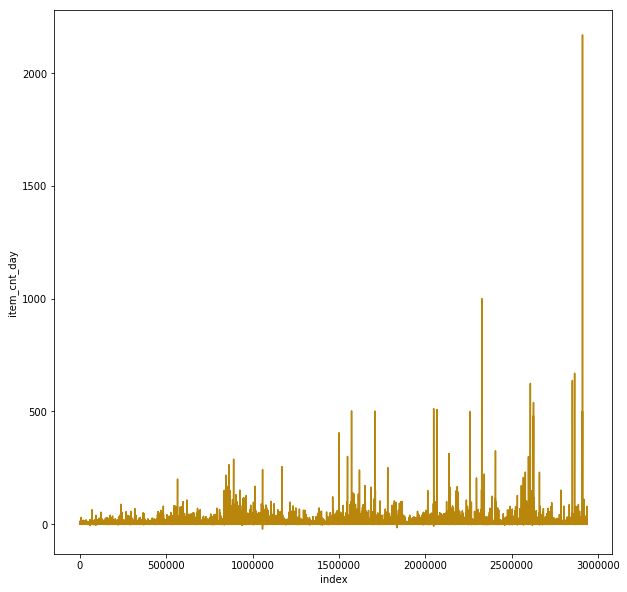

In [23]:
sales.item_cnt_day.plot(color="darkgoldenrod",figsize=(10,10))
plt.ylabel("item_cnt_day")
plt.xlabel("index")

In [32]:
sales[sales.item_cnt_day>1500]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,2015-10-28,33,12,11373,0.91,"2,169.00"


> There some values that are greater than 2000

### Histogram item_cnt_day

(0, 20)

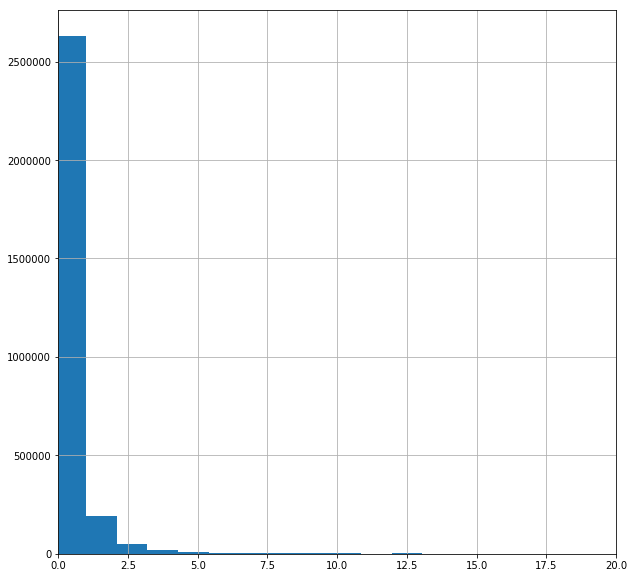

In [25]:
sales.item_cnt_day.hist(bins = 2000, figsize=(10,10))
plt.xlim([0,20])

## item_price

Text(0.5, 0, 'index')

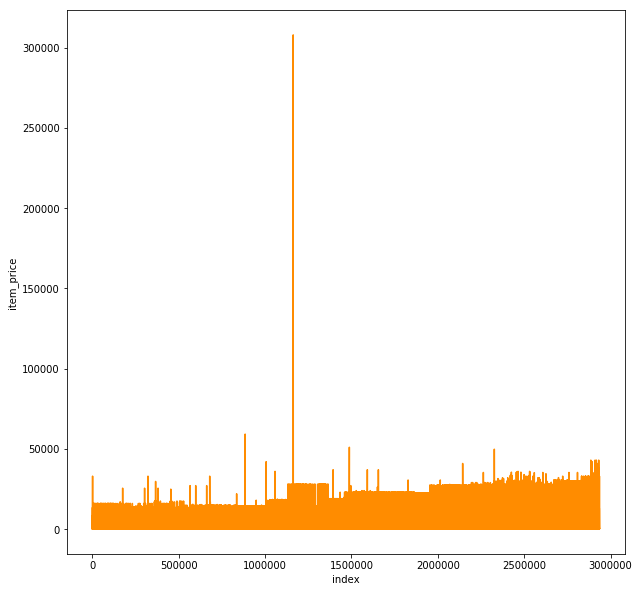

In [26]:
sales.item_price.plot(color="darkorange",figsize=(10,10))
plt.ylabel("item_price")
plt.xlabel("index")

> Definitely, this would be an outlie that should be removed

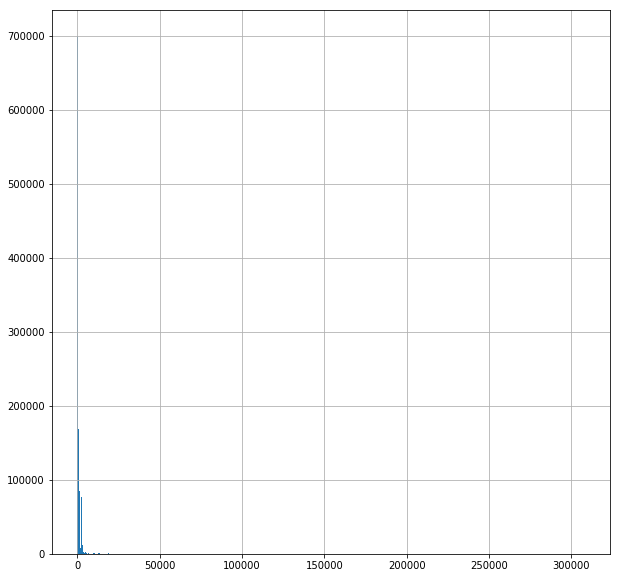

In [28]:
sales.item_price.hist(bins = 2000, figsize=(10,10))


In [31]:
sales[sales["item_price"]>250000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,"307,980.00",1.00


# Agreggate Data to monthly period
> `sales dataset` has instances in a weekly period, we have to make them monthly by grouping each item  with each shop, in addition, we have to create new instances that do not appear in our sales dataset (and put them as item_cnt_day equal tozero) because as we have seem test data was builted using a multiplication of a list of shop_id and item_id, so, there would be combinations we won't find in the sales dataset if we leave it as provided.

#### Create every combination from shop_id and item_id

In [9]:
index_cols = ['shop_id', 'item_id', 'date_block_num']
master_list = []

for block_num in sales['date_block_num'].unique():
    
    # get every shop_id and item_id from each mont (date_block_num)
    cur_shops = sales.loc[sales['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = sales.loc[sales['date_block_num'] == block_num, 'item_id'].unique()
    
    # multiply to get all combinations that could appear in that month 
    master_list.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

# Convert to DataFrame
main_list = pd.DataFrame(np.vstack(master_list), columns = index_cols,dtype=np.int32)

In [10]:
sales_monthly = sales.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': 'sum','item_price': np.mean}).reset_index()
sales_monthly = pd.merge(main_list,sales_monthly,on=['date_block_num','shop_id','item_id'],how='left').fillna(0)
sales_monthly = pd.merge(sales_monthly,items,on=['item_id'],how='left')
sales_monthly = pd.merge(sales_monthly,categories, on=['item_category_id'], how='left')

## Adding year
I add this variable just to use in some plots, make a comparison between each year

In [11]:
sales_monthly["year"] = sales_monthly["date_block_num"].transform(lambda x:  2013 if x<12 else (2014 if x<24 else 2015))

In [12]:
sales_monthly["month"] = sales_monthly["date_block_num"].transform(lambda x:  x+1 if x<12 else (x-11 if x<24 else x-23))

In [89]:
sales_monthly.tail(2)

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_name,item_category_id,item_category_name,cats,year,item_clean,is_blueray,is_bd,is_audiobook,is_dvd,month
10913848,21,7632,33,0.00,0.00,WARHAMMER ACCESSORIES: Space Marine Paint Set ...,64,Подарки - Настольные игры,Gifts,2015,WARHAMMER ACCESSORIES: Space Marine Paint Set ...,0,0,0,0,10
10913849,21,7440,33,0.00,0.00,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,Music,2015,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),0,0,0,0,10


## Checking some categories

> There labels inside each item name like BD DVD BLue Ray and AudioBooks That were written in Russian, we can use this later to train our model

### Adding vector of words without translation

In [13]:
sales_monthly["item_clean"] = sales_monthly.item_name.str.replace("Цифровая версия","(BLUERAY)", regex=False)
sales_monthly["item_clean"] = sales_monthly.item_clean.str.replace("Аудиокниги","(AUDIOBOOK)", regex=False)

### Creating Binary Variables Like is BD, is BlueRay?
> I wondered if these labels where important to include in the analysis

In [14]:
sales_monthly["is_blueray"] = sales_monthly.item_clean.str.contains("(BLUERAY)", regex=False)
sales_monthly["is_blueray"] =  sales_monthly.is_blueray.astype("int8")

In [15]:
sales_monthly["is_bd"] =  sales_monthly.item_clean.str.contains("BD", regex=False)
sales_monthly["is_bd"] =  sales_monthly.is_bd.astype("int8")

In [16]:
sales_monthly["is_audiobook"] =  sales_monthly.item_clean.str.contains("AUDIOBOOK", regex=False)
sales_monthly["is_audiobook"] =  sales_monthly.is_audiobook.astype("int8")

In [17]:
sales_monthly["is_dvd"] =  sales_monthly.item_clean.str.contains("DVD", regex=False)
sales_monthly["is_dvd"] =  sales_monthly.is_dvd.astype("int8")

In [74]:
sales_monthly.columns

Index(['shop_id', 'item_id', 'date_block_num', 'item_cnt_day', 'item_price',
       'item_name', 'item_category_id', 'item_category_name', 'cats', 'year',
       'item_clean', 'is_blueray', 'is_bd', 'is_audiobook', 'is_dvd'],
      dtype='object')

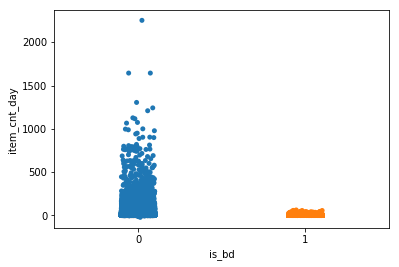

In [48]:
sns.stripplot(y="item_cnt_day", x="is_bd", data=sales_monthly)

In [90]:
sales_frac = sales_monthly.sample(frac=0.1)

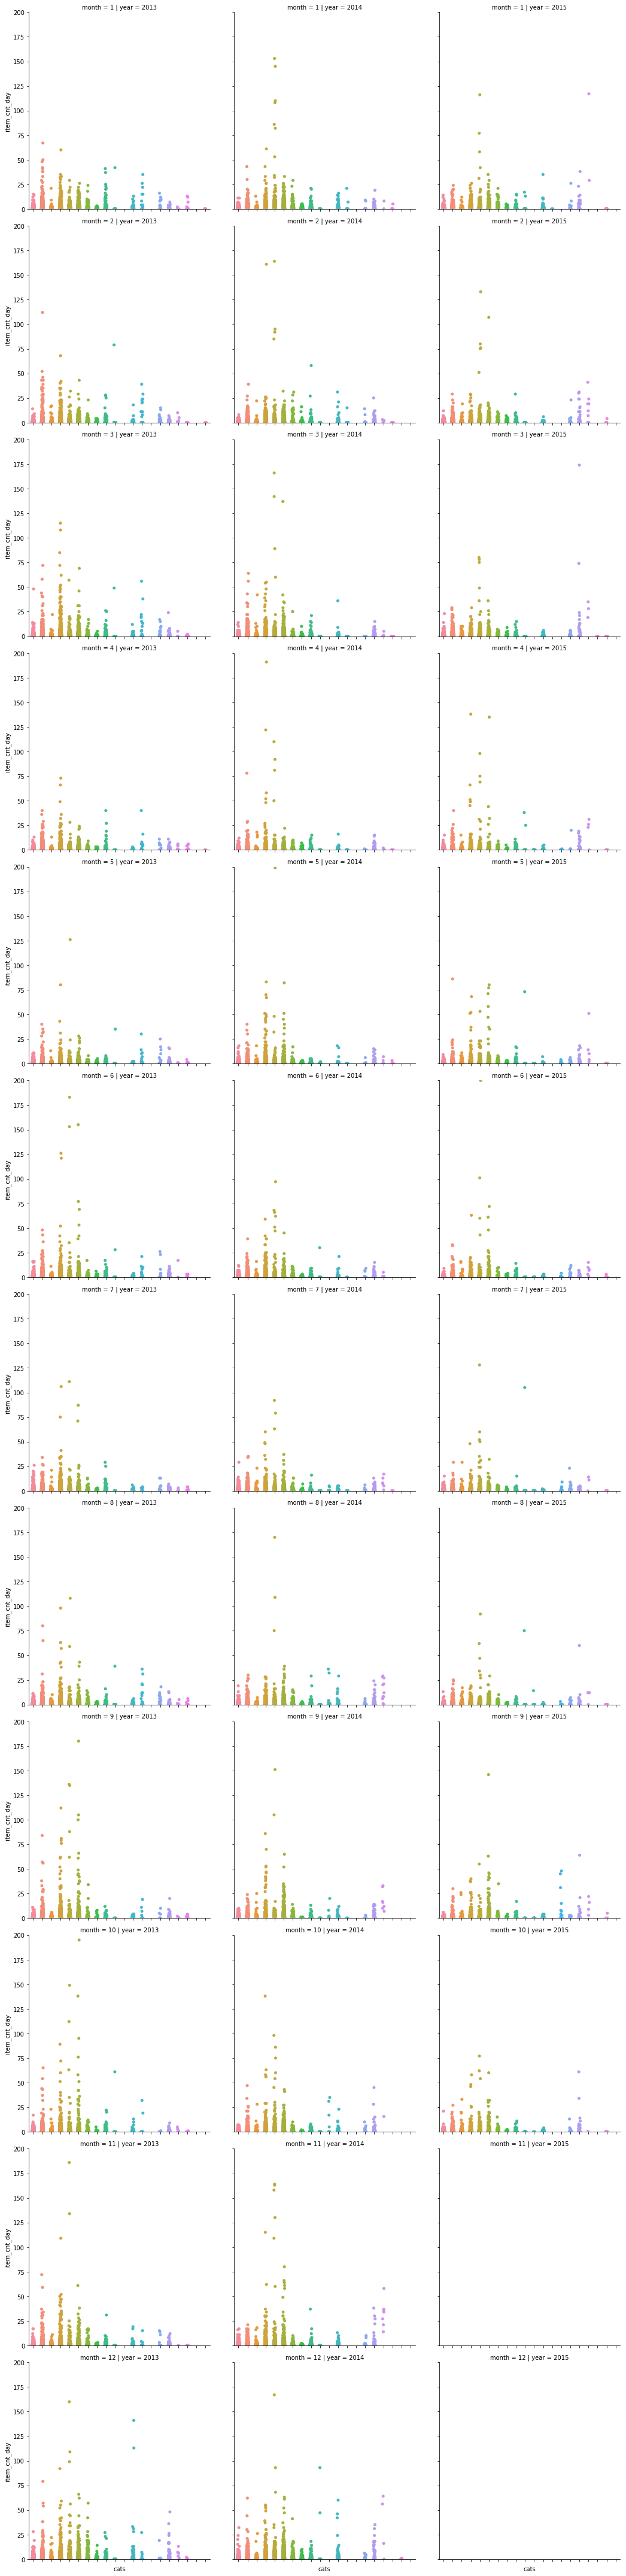

<Figure size 720x720 with 0 Axes>

In [102]:
g = sns.catplot(x="cats", y="item_cnt_day", row="month" , col="year", data=sales_frac, legend=True)
g.set_xticklabels(rotation=70)
g.set(ylim=(0, 200))
plt.figure(figsize=(10,10))
plt.show()

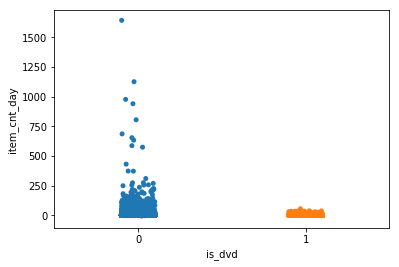

<Figure size 720x720 with 0 Axes>

In [103]:
ax = sns.stripplot(x="is_dvd", y="item_cnt_day", data=sales_frac)
plt.figure(figsize=(10,10))
plt.show()

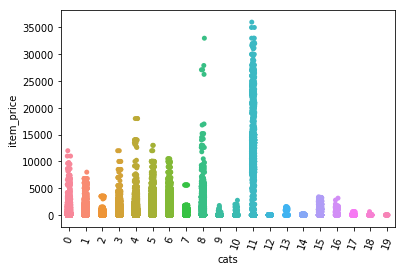

<Figure size 1080x1080 with 0 Axes>

In [108]:
ax = sns.stripplot(x="cats",y="item_price",data=sales_frac)
ax.set_xticklabels(ax.get_xticks(), rotation=70)
plt.figure(figsize=(15,15))
plt.show()

/home/gustavosystemas/.local/lib/python3.5/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


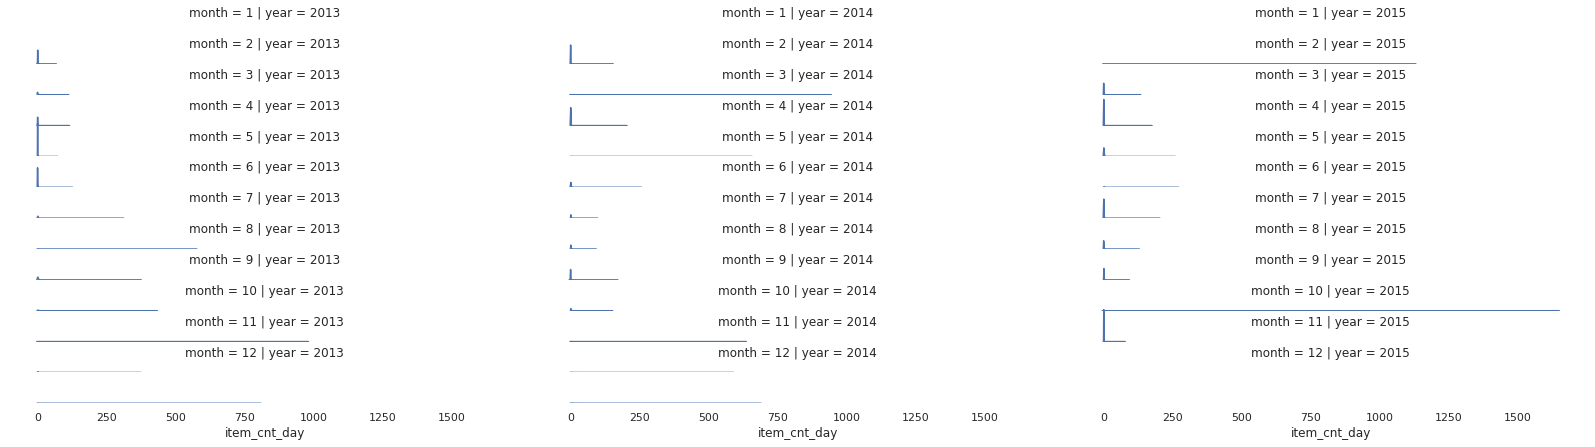

In [125]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
df = sales_frac.copy()
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df,col="year", row="month", aspect=15, height=.5)
g.map(sns.kdeplot, "item_cnt_day",legend=False )

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.fig.subplots_adjust(hspace=-.25)
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.show()

## Persistance Data Monthly

In [11]:
sales_monthly.to_csv("data_montly.csv", index=False)